In [3]:
import torch
import torchvision as tv
import torchvision.transforms.functional as tvf
import torchshow as ts
from IPython import display
from matplotlib import pyplot as plt
from math import exp
import numpy as np


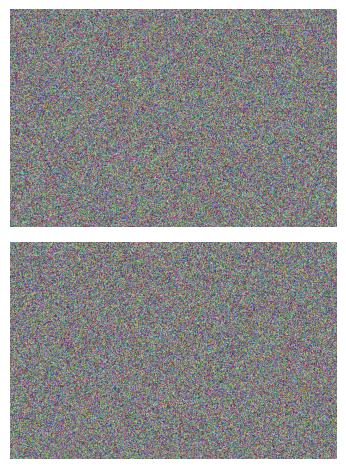

In [15]:
image = torch.rand(2, 3, 400, 600)

ts.show(image)

torch.Size([3, 500, 750])
torch.Size([3, 500, 750])


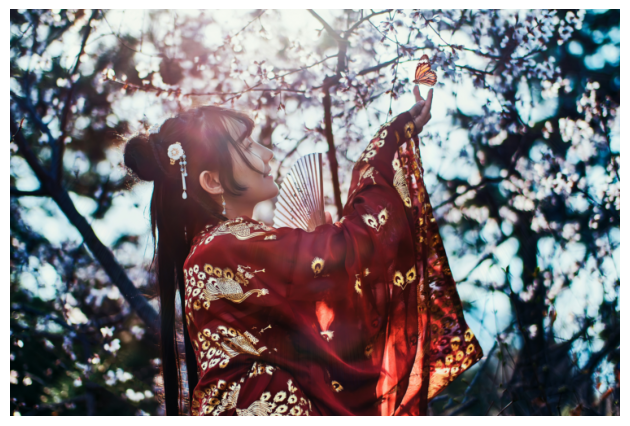

In [5]:
image_path = 'source.jpg'
image_tensor = tv.io.read_image(image_path)
image_tensor = tvf.resize(image_tensor,size=[500])
# Verify the tensor has 3 channels

assert image_tensor.shape[0] == 3, "The image does not have 3 channels"

print(image_tensor.shape) 
ts.show(image_tensor)

In [6]:
def gaussian(x, mu, sigma):
  return exp( -(((x-mu)/(sigma))**2)/2.0 )

def getGaussianKernel(rad : int) -> list[list[float]]:
  sigma = rad/2. # for [-2*sigma, 2*sigma]

  # compute the actual kernel elements
  hkernel = [gaussian(x, rad, sigma) for x in range(2*rad+1)]
  vkernel = [x for x in hkernel]
  kernel2d = [[xh*xv for xh in hkernel] for xv in vkernel]

  # normalize the kernel elements
  kernelsum = sum([sum(row) for row in kernel2d])
  kernel2d = [[x/kernelsum for x in row] for row in kernel2d]
  return kernel2d

def getGaussianKernelRGB(rad : int) -> torch.Tensor:
  krn = torch.tensor(getGaussianKernel(rad))
  krn = krn.repeat(3, 1, 1, 1)
  return krn

def getGaussianKernelGrayscale(rad : int) -> torch.Tensor:
  krn = torch.tensor(getGaussianKernel(rad))
  krn = krn.repeat(1, 1, 1, 1)
  return krn

torch.Size([1, 3, 500, 750])
torch.uint8


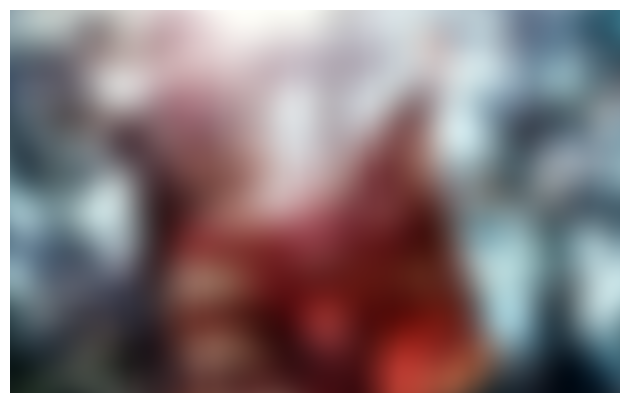

In [20]:


src = image_tensor.unsqueeze(0)  # Adding batch dimension, shape [1, 3, 4000, 6000]
print(src.shape)
print(src.dtype)
# print(src[0][1][1000][2000])
# print(src.shape == image.shape)
# # Perform convolution
blurred_image = torch.nn.functional.conv2d(src.float(), getGaussianKernelRGB(40), padding=1, groups=3)
ts.show(blurred_image)

tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])
torch.Size([1, 1, 500, 750])


/home/navid/.pyenv/versions/3.11.9-debug/lib/python3.11/site-packages/torchshow/visualization.py:388: UserWarning: Original input range is not 0-1 when using grayscale mode. Auto-rescaling it to 0-1 by default.
  warnings.warn('Original input range is not 0-1 when using grayscale mode. Auto-rescaling it to 0-1 by default.')


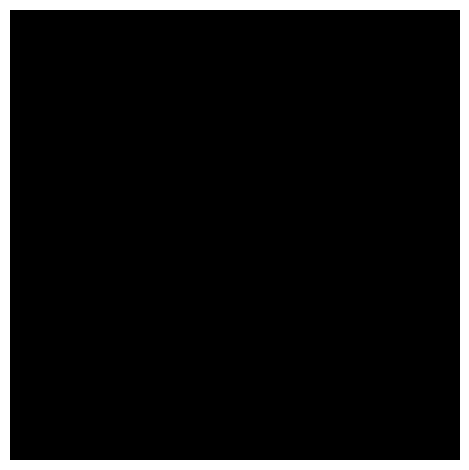

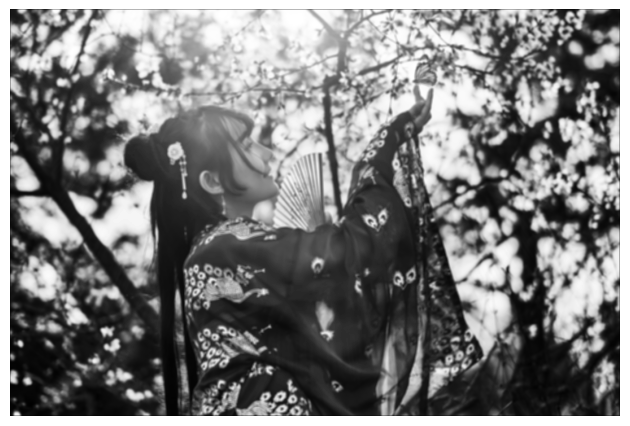

In [34]:
# kernel = torch.tensor([[-1,0,1],[-1,0,1], [-1,0,1]])
kernel = torch.tensor([[1,1,1]
                       ,[1,1,1],
                       [1,1,1]])
kernel = kernel / kernel.sum()
ts.show(kernel)

print(kernel)
kernel = kernel.repeat(1, 1, 1, 1)
edge_image = torch.nn.functional.conv2d(tvf.rgb_to_grayscale(src).float(), kernel, padding=1, groups=1)
print(edge_image.shape)
ts.show(edge_image)


(50, 75, 3)


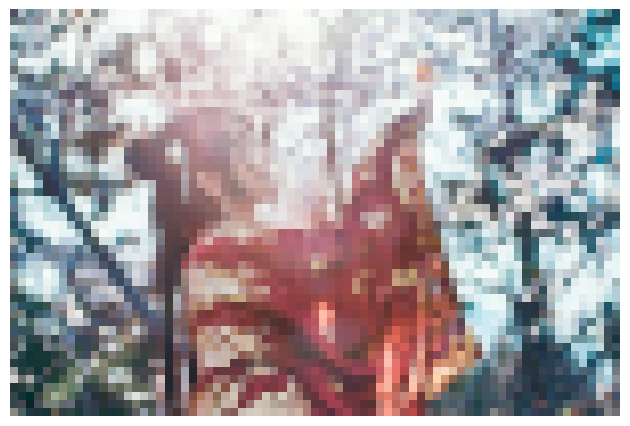

In [77]:
def tensor_to_numpy(image_tensor):
    # Convert tensor to PIL image and then to numpy array
    to_pil = tv.transforms.ToPILImage()
    pil_image = to_pil(image_tensor)
    numpy_image = np.array(pil_image)
    return numpy_image


def max_pooling(image, pool_size):
    output_height = image.shape[0] // pool_size
    output_width = image.shape[1] // pool_size
    pooled_image = np.zeros((output_height, output_width, image.shape[2]))
    for h in range(output_height):
        for w in range(output_width):
            for c in range(image.shape[2]):
                h_start = h * pool_size
                w_start = w * pool_size
                h_end = h_start + pool_size
                w_end = w_start + pool_size
                pooled_image[h, w, c] = torch.sqrt(torch.tensor(image[h_start:h_end, w_start:w_end, c]).sum())

    return pooled_image
pool_size = 10
#     dct = [np.mean, np.min, np.max, np.average]
pooled_image = max_pooling(tensor_to_numpy(image_tensor), pool_size)
print(pooled_image.shape)
ts.show(pooled_image)

In [76]:
mo = [-33.00,2.00,24.00,34.00]
softmax_output = torch.nn.functional.softmax(torch.tensor(mo), dim=0)

print(
softmax_output[0] + softmax_output[1] + softmax_output[2] + softmax_output[3] 
    
)
print(softmax_output)

tensor(1.)
tensor([7.9845e-30, 1.2664e-14, 4.5398e-05, 9.9995e-01])
